# MNIST PCA

## Get the MNIST dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
X = X.astype(np.uint16)
y = y.astype(np.uint8)

In [2]:
from sklearn.model_selection import train_test_split

num_train = 50000
num_test = 10000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


## Train a random forest classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()
print('Time taken = {0:.1f} s'.format(end-start))

Time taken = 41.2 s


In [4]:
rnd_clf.score(X_test, y_test)

0.9674

## PCA to reduce dataset dimensionality

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [6]:
X_reduced.shape

(60000, 154)

## Train a random forest classifier on the compressed dataset

In [7]:
rnd_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)

start_reduced = time.time()
rnd_clf_reduced.fit(X_reduced, y_train)
end_reduced = time.time()
print('Time taken = {0:.1f} s'.format(end_reduced-start_reduced))

Time taken = 87.5 s


In [8]:
rnd_clf.score(X_test, y_test)

0.9674

## Use t-SNE

In [9]:
from sklearn.manifold import TSNE

num_samples = 1000

tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(X_reduced[:num_samples])

In [10]:
embedding.shape

(1000, 2)

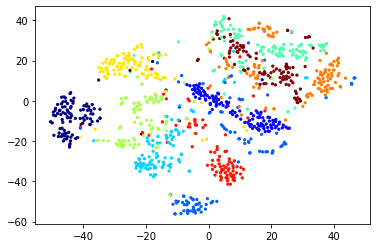

In [16]:
import matplotlib.pyplot as plt

plt.scatter(embedding[:,0], embedding[:,1], c=y[:num_samples], cmap='jet', s=5)
plt.show()

## Try PCA for visualisation

In [17]:
from sklearn.decomposition import PCA

num_samples = 1000

pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(X[:num_samples])

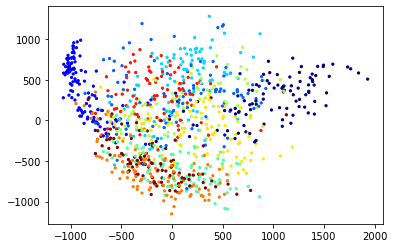

In [18]:
plt.scatter(embedding_pca[:,0], embedding_pca[:,1], c=y[:num_samples], cmap='jet', s=5)
plt.show()